In [2]:
# importing all the necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("file:///C:/Users/lenovo/Downloads/project%201/archive/preprocessed_airline_dataset.csv")

In [4]:
data.shape

(1324, 19)

In [5]:
data.head()

,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,recommended,trip_verified,rating,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment
0,service was mediocre at best,Gary Storer,03-10-2023,United Kingdom,"Just returned from Chicago, flew out 10 days ...",A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,01-10-2023,no,Not Verified,2,2,3,1,2,2,-1
1,BA standards continue to decline,A Jensen,02-10-2023,United Kingdom,BA standards continue to decline every time ...,A320,Business,Business Class,London Heathrow to Munich,01-09-2023,no,Verified,2,2,1,2,1,1,-1
2,"won the race to the bottom""",John Rockett,02-10-2023,United Kingdom,Awful. Business class check in queue just as...,A320,Couple Leisure,Business Class,Heathrow to Istanbul,01-09-2023,no,Not Verified,2,2,3,2,1,1,-1
3,Not a reliable airline,Tatiana Bobrovskaya,02-10-2023,United Kingdom,Not a reliable airline. You cannot trust the...,A320,Business,Economy Class,London to Geneva,01-10-2023,no,Verified,3,4,4,2,1,1,-1
4,Very disappointed,Tom Slowbe,28-09-2023,United States,"The airplanes and the lounges are worn out, o...",777-300 and A320,Couple Leisure,First Class,Dallas to Dubrovnik via Heathrow,01-09-2023,no,Verified,1,1,4,4,3,2,3


In [12]:
data = data[~(data.traveller_type.isnull())]

<Axes: xlabel='rating', ylabel='count'>

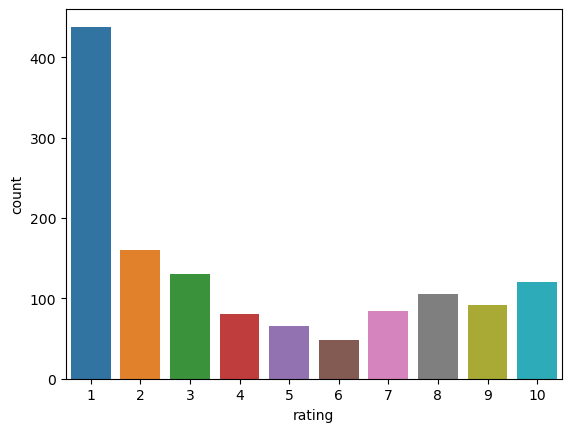

In [15]:
sns.countplot(x = "rating", data = data )

<Axes: xlabel='seat_type', ylabel='count'>

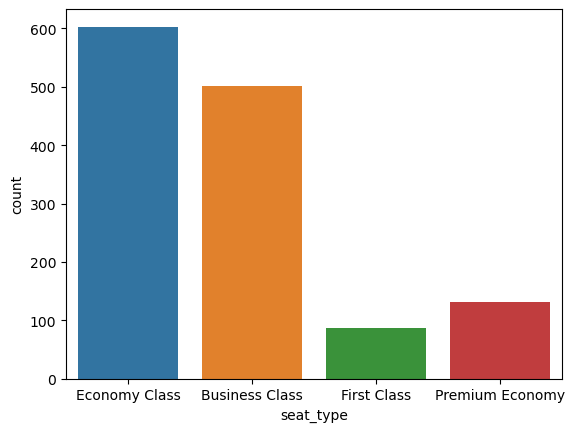

In [19]:
sns.countplot(x = "seat_type", data = data )

<Axes: xlabel='seat_type', ylabel='count'>

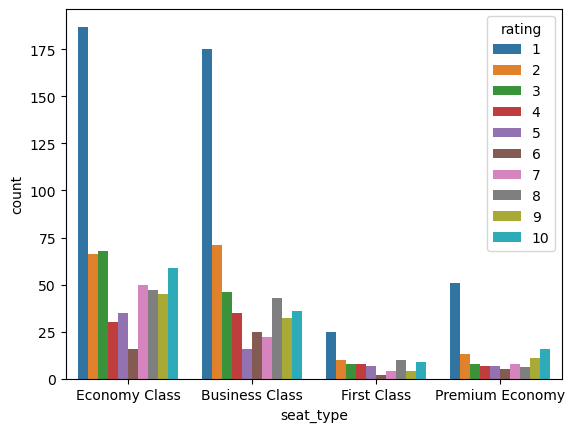

In [17]:
sns.countplot(x = "seat_type", hue = "rating", data = data )

<Axes: xlabel='seat_type', ylabel='count'>

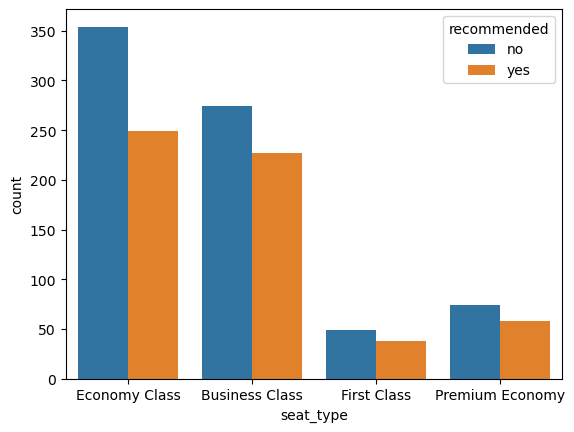

In [20]:
sns.countplot(x = "seat_type", hue = "recommended", data = data )

In [31]:
data.dtypes

header                 object
author                 object
date                   object
place                  object
content                object
aircraft               object
traveller_type         object
seat_type              object
route                  object
date_flown             object
recommended            object
trip_verified          object
rating                  int64
seat_comfort            int64
cabin_staff_service     int64
food_beverages          int64
ground_service          int64
value_for_money         int64
entertainment           int64
dtype: object

<Axes: xlabel='count', ylabel='place'>

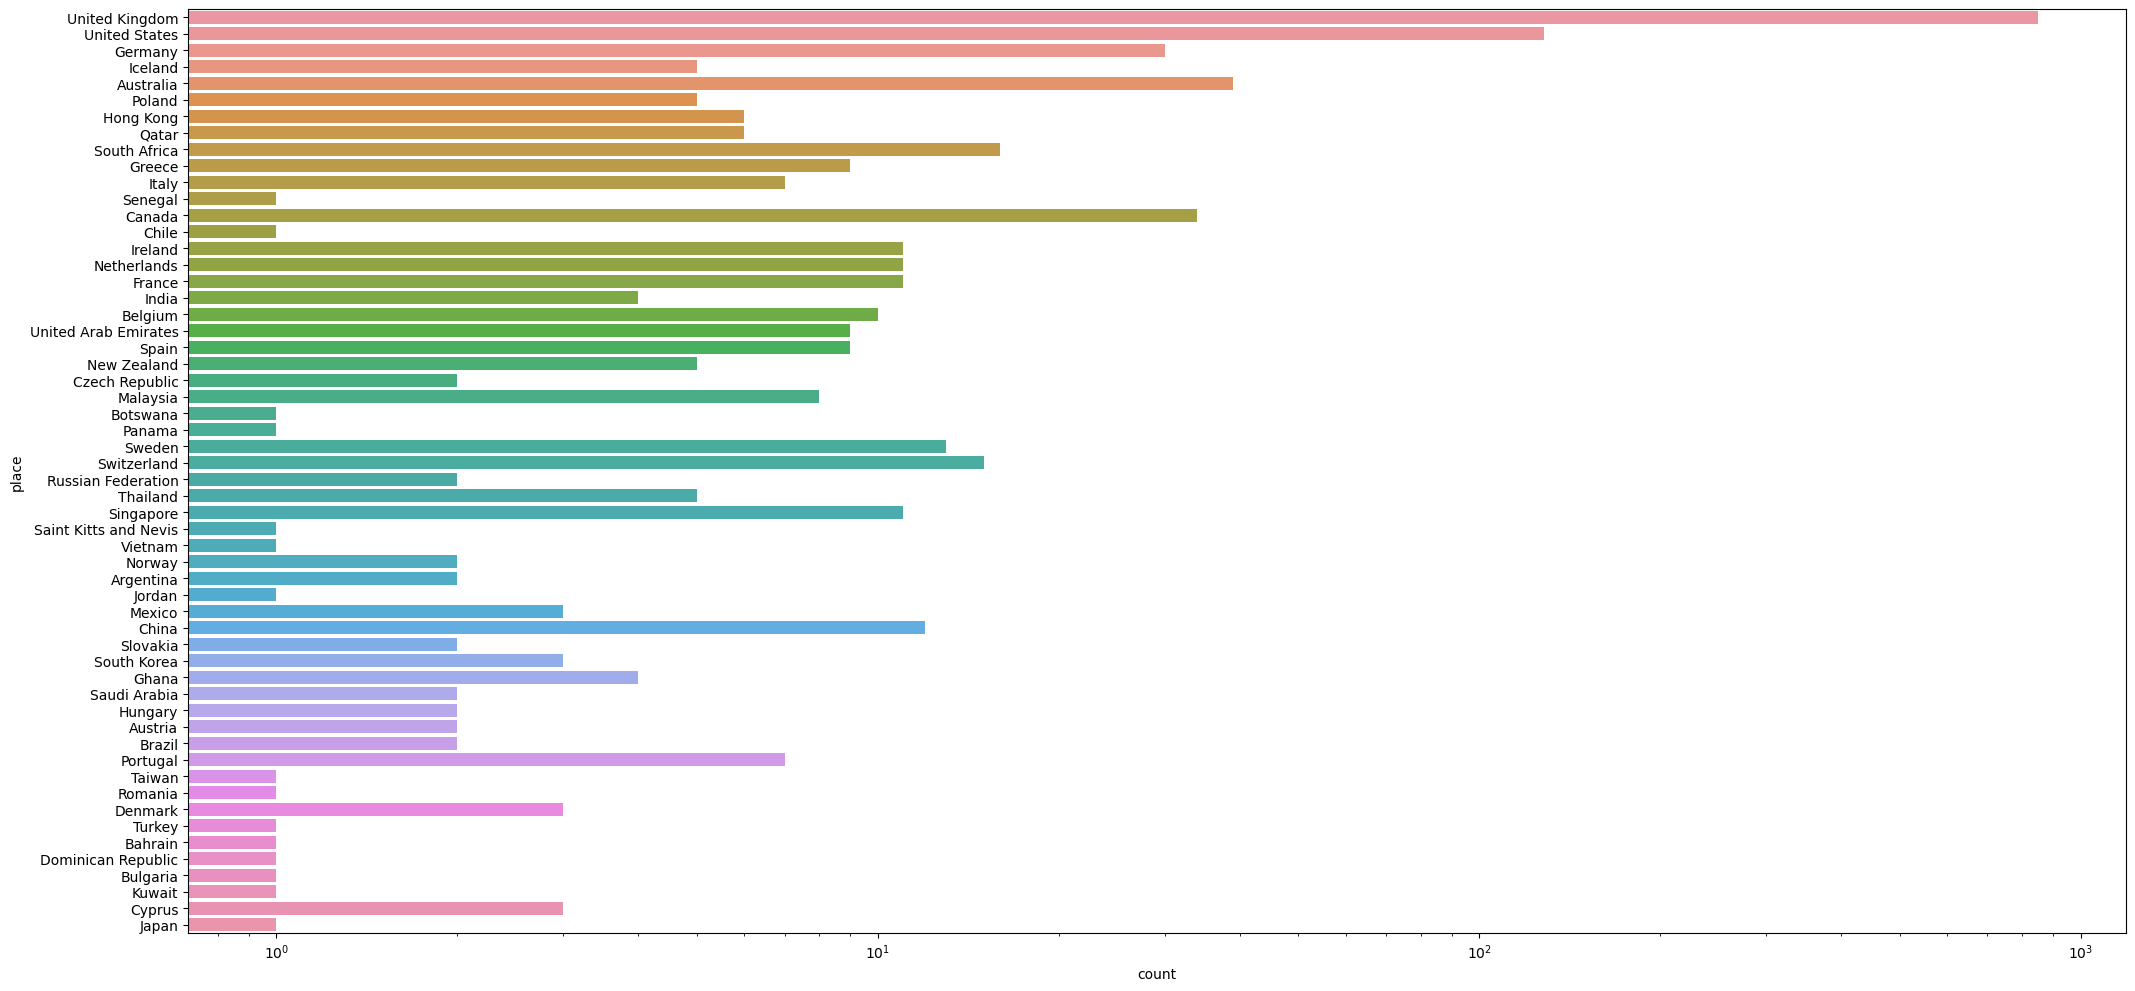

In [29]:
plt.figure(figsize =(25,12) )
plt.xscale("log")
sns.countplot(y = "place", data = data)


In [34]:
data["date"]=pd.to_datetime(data["date"],format='%d-%m-%Y')


In [39]:
data.head(2)

,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,recommended,trip_verified,rating,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment
0,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,"Just returned from Chicago, flew out 10 days ...",A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,01-10-2023,no,Not Verified,2,2,3,1,2,2,-1
1,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,BA standards continue to decline every time ...,A320,Business,Business Class,London Heathrow to Munich,01-09-2023,no,Verified,2,2,1,2,1,1,-1


In [48]:
data.pivot_table(index = "seat_type", columns ="traveller_type", values = "rating", aggfunc = lambda x: np.quantile(x, 0.5))

traveller_type,Business,Couple Leisure,Family Leisure,Solo Leisure
seat_type,,,,
Business Class,3.0,3.0,3.0,2.0
Economy Class,3.0,3.0,2.5,4.0
First Class,5.5,4.0,6.0,3.0
Premium Economy,2.0,3.0,1.0,5.0


In [77]:
data.pivot_table(index = "seat_type", columns ="traveller_type", values = "rating", aggfunc ="mean")

traveller_type,Business,Couple Leisure,Family Leisure,Solo Leisure
seat_type,,,,
Business Class,4.168919,4.113990,3.833333,3.330189
Economy Class,4.254098,4.405556,3.765306,4.699507
First Class,5.277778,4.285714,5.666667,3.440000
Premium Economy,3.357143,4.184211,2.583333,5.055556


In [54]:
data["year"]=pd.DatetimeIndex(data["date"]).year

In [55]:
data.head()

,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,recommended,trip_verified,rating,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment,year
0,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,"Just returned from Chicago, flew out 10 days ...",A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,01-10-2023,no,Not Verified,2,2,3,1,2,2,-1,2023
1,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,BA standards continue to decline every time ...,A320,Business,Business Class,London Heathrow to Munich,01-09-2023,no,Verified,2,2,1,2,1,1,-1,2023
2,"won the race to the bottom""",John Rockett,2023-10-02,United Kingdom,Awful. Business class check in queue just as...,A320,Couple Leisure,Business Class,Heathrow to Istanbul,01-09-2023,no,Not Verified,2,2,3,2,1,1,-1,2023
3,Not a reliable airline,Tatiana Bobrovskaya,2023-10-02,United Kingdom,Not a reliable airline. You cannot trust the...,A320,Business,Economy Class,London to Geneva,01-10-2023,no,Verified,3,4,4,2,1,1,-1,2023
4,Very disappointed,Tom Slowbe,2023-09-28,United States,"The airplanes and the lounges are worn out, o...",777-300 and A320,Couple Leisure,First Class,Dallas to Dubrovnik via Heathrow,01-09-2023,no,Verified,1,1,4,4,3,2,3,2023


In [62]:
data.groupby("year").mean()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7340\1096391150.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("year").mean()


,rating,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment
year,,,,,,,
2016,4.164021,3.111111,3.428571,2.656085,2.978836,2.835979,1.962963
2017,4.608142,2.715013,3.015267,1.964377,3.048346,2.526718,1.290076
2018,4.574074,2.828704,3.324074,2.421296,3.087963,2.842593,1.393519
2019,4.087156,2.958716,3.399083,2.522936,3.220183,2.981651,1.623853
2020,4.836364,2.836364,3.600000,2.690909,2.927273,3.163636,1.400000
2021,3.454545,3.022727,3.840909,2.909091,3.068182,3.136364,0.386364
2022,3.577982,2.944954,3.302752,2.614679,2.752294,2.816514,1.366972
2023,2.626263,2.808081,3.262626,2.464646,2.898990,2.676768,1.252525


In [65]:
data.trip_verified.value_counts(normalize = True) * 100

Verified        91.761149
Not Verified     8.238851
Name: trip_verified, dtype: float64

<Axes: xlabel='rating', ylabel='count'>

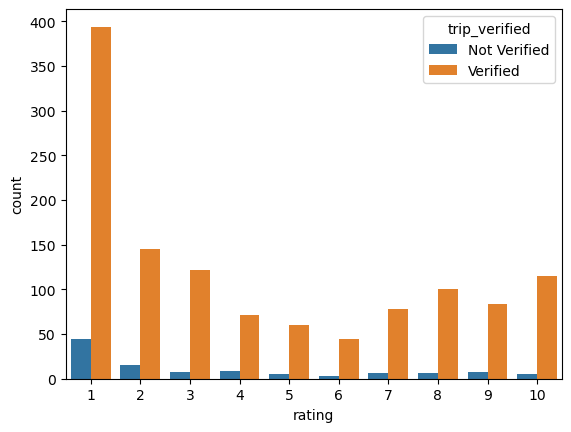

In [67]:
sns.countplot(x = "rating", hue = "trip_verified", data = data )

In [68]:
data.columns

Index(['header', 'author', 'date', 'place', 'content', 'aircraft',
       'traveller_type', 'seat_type', 'route', 'date_flown', 'recommended',
       'trip_verified', 'rating', 'seat_comfort', 'cabin_staff_service',
       'food_beverages', 'ground_service', 'value_for_money', 'entertainment',
       'year'],
      dtype='object')

In [73]:
data.place.value_counts()

United Kingdom           848
United States            128
Australia                 39
Canada                    34
Germany                   30
South Africa              16
Switzerland               15
Sweden                    13
China                     12
Ireland                   11
Singapore                 11
France                    11
Netherlands               11
Belgium                   10
Greece                     9
United Arab Emirates       9
Spain                      9
Malaysia                   8
Italy                      7
Portugal                   7
Qatar                      6
Hong Kong                  6
Iceland                    5
New Zealand                5
Poland                     5
Thailand                   5
India                      4
Ghana                      4
Denmark                    3
South Korea                3
Mexico                     3
Cyprus                     3
Hungary                    2
Saudi Arabia               2
Brazil        

In [75]:
data.pivot_table(index = "place", columns ="seat_type", values = "rating", aggfunc ="mean")

seat_type,Business Class,Economy Class,First Class,Premium Economy
place,,,,
Argentina,NaN,NaN,NaN,6.000000
Australia,3.714286,3.187500,2.500000,7.857143
Austria,NaN,3.500000,NaN,NaN
Bahrain,6.000000,NaN,NaN,NaN
Belgium,1.625000,5.500000,NaN,NaN
Botswana,NaN,7.000000,NaN,NaN
Brazil,1.000000,NaN,2.000000,NaN
Bulgaria,3.000000,NaN,NaN,NaN
Canada,4.500000,3.769231,4.500000,4.857143


In [70]:
res = data[['rating', 'seat_comfort', 'cabin_staff_service','food_beverages', 'ground_service', 'value_for_money']].corr()

<Axes: >

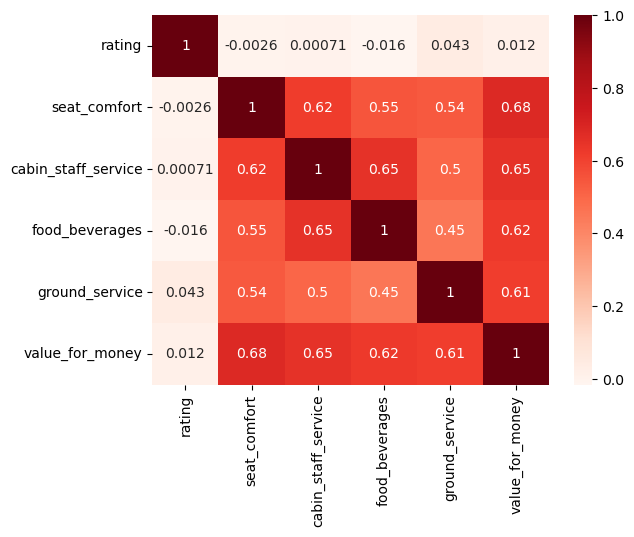

In [71]:
sns.heatmap(res,annot = True, cmap = "Reds")

### Final Insights
- Mostly people give 1 rating.
- Mostly people travels rom economy class.
- Mostly people recommended the economy class seat type.
- Most of the travellers are from united kngdom.
- people who are travelling for business purpose they give higher rating than others
- The rating has been declining year by year.
- Entertainment receives notably lower ratings from people.




  